In [1]:
#check tensorflow version
try:
    import tensorflow as tf
    print("tensorflow version: {}".format(tf.__version__))
except(ImportError, ModuleNotFoundError) as e:
    print("tensorflow not installed")
    !pip3 install tensorflow==2.15.0

#check if user is mac
import platform
if platform.system() == 'Darwin':
    print("You are using a Mac")
    try:
        import tensorflow_macos as tfm
        print("tensorflow-macos version: {}".format(tfm.__version__))
    except(ImportError, ModuleNotFoundError) as e:
        print("tensorflow-macos not installed")
        !pip3 install tensorflow-macos==2.15.0
else:
    print("You are not using a Mac")
# check keras version
try:
    import keras
    print("keras version: {}".format(keras.__version__))
except(ImportError, ModuleNotFoundError) as e:
    print("keras not installed")
    !pip3 install keras==2.15.0
    
# update peters pip
!pip3 install --upgrade pip



tensorflow version: 2.15.0
You are not using a Mac
keras version: 2.15.0


In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
import tensorflow as tf
import numpy as np
import random
import os

IMAGE_DIR = "data/images"
TRAINING_DIR = "data/training_set"
TEST_DIR = "data/testing_set"
ROTATED_DIR = "data/rotated_set"

TOTAL_EPOCH = 10
BATCH_SIZE = 512
pokemon_list = os.listdir(IMAGE_DIR)
poke_dict = {string: index for index, string in enumerate(pokemon_list)}

# can speed up our compilation by pre-processing our images at once
def resize_image(image_path):
    with Image.open(image_path) as i:
        if i.mode != 'RGB':
            i = i.convert('RGB')
        i = i.resize((64, 64))
        return np.array(i)

In [3]:
# # check if training and testing directories exist
# if not os.path.exists(TRAINING_DIR):
#     print("Training directory does not exist")
#     print("Creating training directory")
#     os.mkdir(TRAINING_DIR)
# else:
#     for pokemon in os.listdir(TRAINING_DIR):
#         for image in os.listdir(TRAINING_DIR + '/' + pokemon):
#             os.remove(TRAINING_DIR + '/' + pokemon + '/' + image)
    

# if not os.path.exists(TEST_DIR):
#     print("Testing directory does not exist")
#     print("Creating testing directory")
#     os.mkdir(TEST_DIR)
# else:
#     for pokemon in os.listdir(TEST_DIR):
#         for image in os.listdir(TEST_DIR + '/' + pokemon):
#             os.remove(TEST_DIR + '/' + pokemon + '/' + image)

# print("Creating directories for each pokemon")
# # add all pokemon to each directory
# for pokemon in pokemon_list:
#     if not os.path.exists(TRAINING_DIR + '/' + pokemon):
#         os.mkdir(TRAINING_DIR + '/' + pokemon)
#     if not os.path.exists(TEST_DIR + '/' + pokemon):
#         os.mkdir(TEST_DIR + '/' + pokemon)

        
# print("Splitting images into training and testing sets")
        
# # iterate through all images, if random number is less than 0.8, add to training set, else add to testing set
# for i,pokemon in enumerate(pokemon_list):
#     for image in os.listdir(IMAGE_DIR + '/' + pokemon):
#         img = resize_image(IMAGE_DIR + '/' + pokemon + '/' + image)
#         plt.imsave(TRAINING_DIR + '/' + pokemon + '/' + image, img)
#         plt.imsave(TRAINING_DIR + '/' + pokemon + '/' + image[:-4] + '_90.png', np.rot90(img))
#         plt.imsave(TRAINING_DIR + '/' + pokemon + '/' + image[:-4] + '_180.png', np.rot90(img, 2))
#         plt.imsave(TRAINING_DIR + '/' + pokemon + '/' + image[:-4] + '_270.png', np.rot90(img, 3))
#         if random.random() > .8:
#             plt.imsave(TEST_DIR + '/' + pokemon + '/' + image, img)
#     print("\rCompleted {} of {}".format(i+1, len(pokemon_list)), end="")

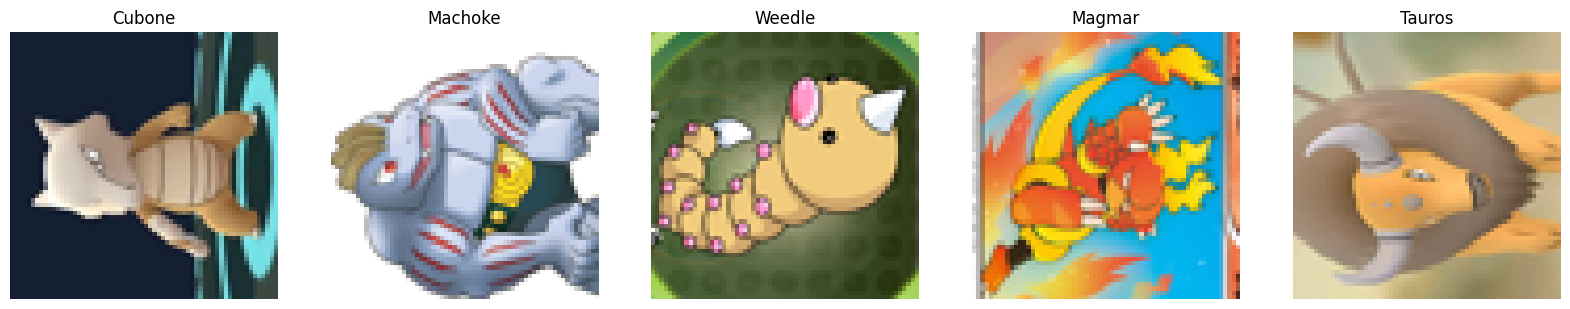

In [4]:
fig, ax = plt.subplots(1, 5, figsize=(20, 20))
for i in range(5):
    random_pokemon = random.choice(os.listdir(TRAINING_DIR))
    random_pokemon_image = random.choice(os.listdir(TRAINING_DIR + '/' + random_pokemon))
    img = mpimg.imread(TRAINING_DIR + '/' + random_pokemon + '/' + random_pokemon_image)
    ax[i].set_title(random_pokemon)
    ax[i].axis('off')
    ax[i].imshow(img)

In [5]:
print("Getting Training Photos")
#loop through creating dataset that contains [label, path_to_image]
dataset = []
for poke_folder in os.listdir(TRAINING_DIR):
    print(poke_folder, end=", ")
    for poke_img in os.listdir(TRAINING_DIR + '/' + poke_folder):
        img = resize_image(TRAINING_DIR + '/' + poke_folder + '/' + poke_img)
        dataset.append([poke_folder, img])
print("\nDone")
# place training data into x and labels into y
y_train = np.array([poke_dict[x[0]] for x in dataset])
x_train = np.array([x[1] for x in dataset])

# shuffle the lists with same order
zipped = list(zip(x_train, y_train))
random.shuffle(zipped)
x_train, y_train = zip(*zipped)
x_train, y_train = np.array(list(x_train)), np.array(list(y_train))

print("Getting Testing Photos")
dataset = []
for poke_folder in os.listdir(TEST_DIR):
    print(poke_folder, end=", ")
    for poke_img in os.listdir(TEST_DIR + '/' + poke_folder):
        img = resize_image(TEST_DIR + '/' + poke_folder + '/' + poke_img)
        dataset.append([poke_folder, img])
print("\nDone")

y_test = np.array([poke_dict[x[0]] for x in dataset])
x_test = np.array([x[1] for x in dataset])

# shuffle the lists with same order
zipped = list(zip(x_test, y_test))
random.shuffle(zipped)
x_test, y_test = zip(*zipped)
x_test, y_test = np.array(list(x_test)), np.array(list(y_test))

x_test = x_test / 255.0
x_train = x_train / 255.0

print("Reshaping")
# Flatten the image arrays for the MLP input
x_test = x_test.reshape(x_test.shape[0], -1)
x_train = x_train.reshape(x_train.shape[0], -1)
print("Done")

x_train = x_train.reshape(x_train.shape[0], 64, 64, 3)
x_test = x_test.reshape(x_test.shape[0], 64, 64, 3)

print(f"Number of training data: {len(y_train)}")
print(f"Number of testing data: {len(y_test)}")



Getting Training Photos
Abra, Aerodactyl, Alakazam, Alolan Sandslash, Arbok, Arcanine, Articuno, Beedrill, Bellsprout, Blastoise, Bulbasaur, Butterfree, Caterpie, Chansey, Charizard, Charmander, Charmeleon, Clefable, Clefairy, Cloyster, Cubone, Dewgong, Diglett, Ditto, Dodrio, Doduo, Dragonair, Dragonite, Dratini, Drowzee, Dugtrio, Eevee, Ekans, Electabuzz, Electrode, Exeggcute, Exeggutor, Farfetchd, Fearow, Flareon, Gastly, Gengar, Geodude, Gloom, Golbat, Goldeen, Golduck, Golem, Graveler, Grimer, Growlithe, Gyarados, Haunter, Hitmonchan, Hitmonlee, Horsea, Hypno, Ivysaur, Jigglypuff, Jolteon, Jynx, Kabuto, Kabutops, Kadabra, Kakuna, Kangaskhan, Kingler, Koffing, Krabby, Lapras, Lickitung, Machamp, Machoke, Machop, Magikarp, Magmar, Magnemite, Magneton, Mankey, Marowak, Meowth, Metapod, Mew, Mewtwo, Moltres, MrMime, Muk, Nidoking, Nidoqueen, Nidorina, Nidorino, Ninetales, Oddish, Omanyte, Omastar, Onix, Paras, Parasect, Persian, Pidgeot, Pidgeotto, Pidgey, Pikachu, Pinsir, Poliwag, Po

# Create the Convolutional Neural Network

In [27]:
#include batch normalization and dropout
inputs = tf.keras.Input(shape=(64, 64, 3))
model = tf.keras.Sequential([
    inputs,
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(32, (3, 3), activation='tanh', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(64, (3, 3), activation='tanh', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(128, (3, 3), activation='tanh', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Flatten(),
    # tf.keras.layers.Dense(512, activation='relu', kernel_initializer='he_uniform',kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    # tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(150, activation='softmax', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.summary()


#visualize the model using tensorboard

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_23 (Conv2D)          (None, 64, 64, 32)        896       
                                                                 
 conv2d_24 (Conv2D)          (None, 64, 64, 32)        9248      
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 32, 32, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_25 (Conv2D)          (None, 32, 32, 64)        18496     
                                                                 
 conv2d_26 (Conv2D)          (None, 32, 32, 64)        36928     
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 16, 16, 64)        0         
 ng2D)                                                

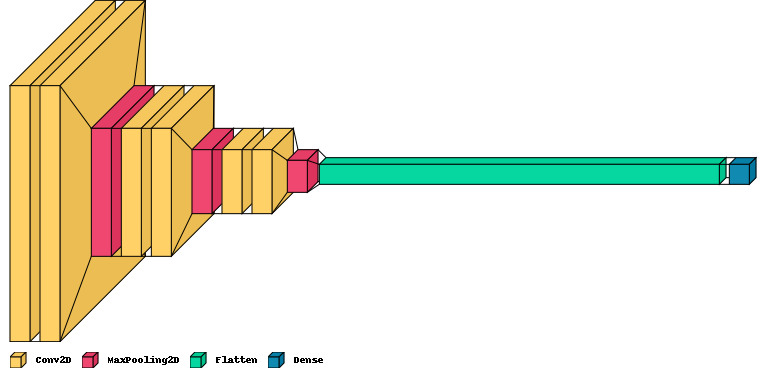

In [28]:
import visualkeras
visualkeras.layered_view(model, legend=True, to_file='output/model.png')


# Train the model

In [29]:
history = model.fit(x_train, y_train, epochs=TOTAL_EPOCH, batch_size =BATCH_SIZE, validation_data=(x_test, y_test))

test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)
print(test_acc)

Epoch 1/10


c:\Users\scran\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


43/43 [==============================] - 124s 3s/step - loss: 4.5304 - accuracy: 0.0652 - val_loss: 3.8023 - val_accuracy: 0.1489
Epoch 2/10
43/43 [==============================] - 170s 4s/step - loss: 3.0987 - accuracy: 0.2763 - val_loss: 3.0110 - val_accuracy: 0.2911
Epoch 3/10
43/43 [==============================] - 149s 3s/step - loss: 2.3919 - accuracy: 0.4382 - val_loss: 2.6031 - val_accuracy: 0.4193
Epoch 4/10
43/43 [==============================] - 154s 4s/step - loss: 1.8901 - accuracy: 0.5630 - val_loss: 2.4521 - val_accuracy: 0.4562
Epoch 5/10
43/43 [==============================] - 141s 3s/step - loss: 1.5047 - accuracy: 0.6652 - val_loss: 2.4387 - val_accuracy: 0.4775
Epoch 6/10
43/43 [==============================] - 155s 4s/step - loss: 1.1893 - accuracy: 0.7513 - val_loss: 2.4326 - val_accuracy: 0.5041
Epoch 7/10
43/43 [==============================] - 143s 3s/step - loss: 0.9248 - accuracy: 0.8320 - val_loss: 2.4254 - val_accuracy: 0.5158
Epoch 8/10
43/43 [======

# Plot the accuracy for all classes

43/43 [==============================] - 3s 50ms/step


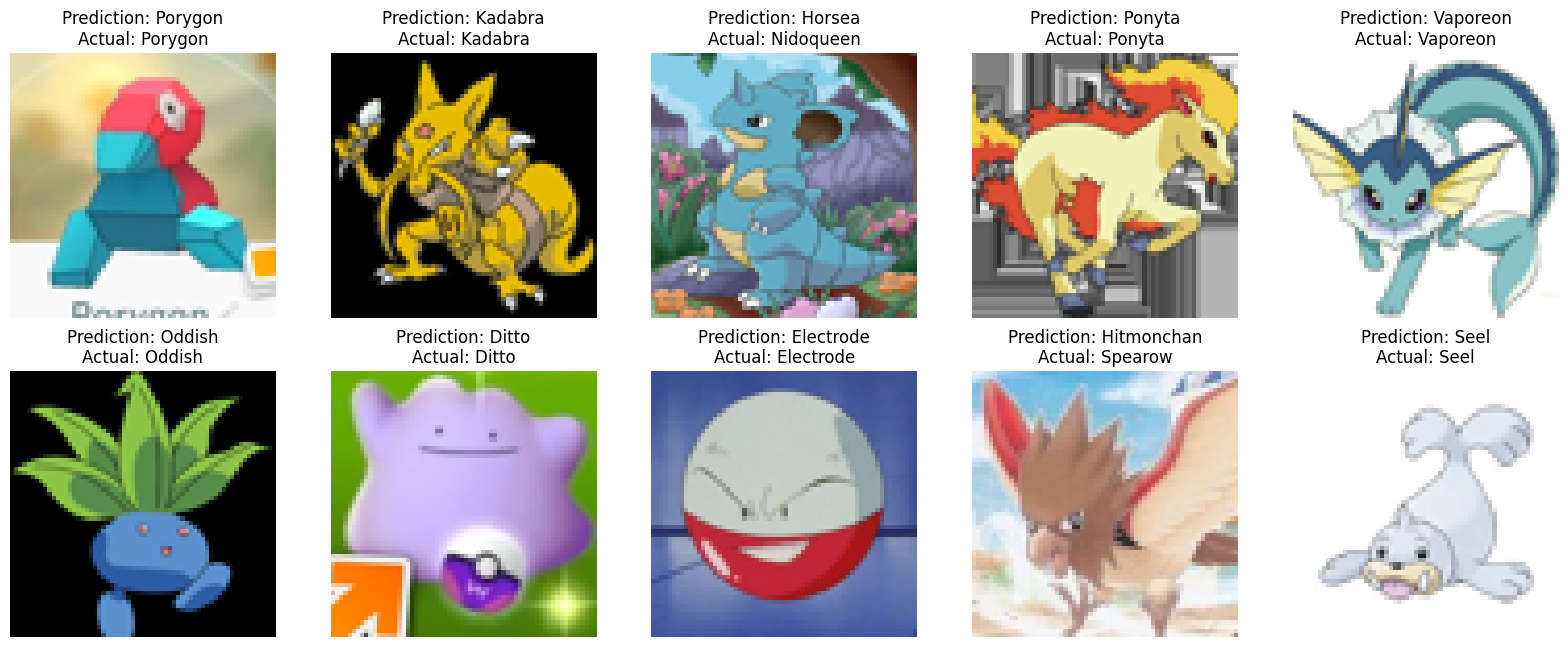

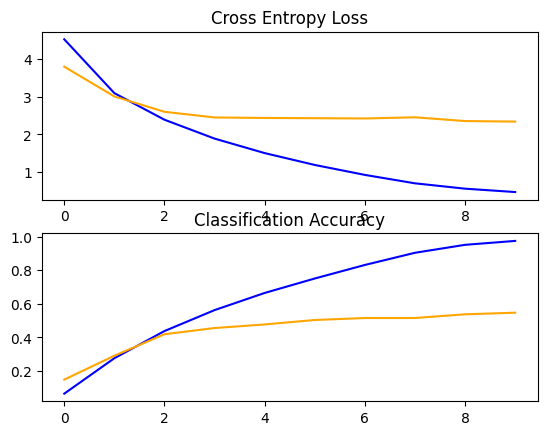

Accuracy for class: Abra         is 33.3 %
Accuracy for class: Aerodactyl   is 33.3 %
Accuracy for class: Alakazam     is 33.3 %
Accuracy for class: Alolan Sandslash is 58.3 %
Accuracy for class: Arbok        is 80.0 %
Accuracy for class: Arcanine     is 33.3 %
Accuracy for class: Articuno     is 44.4 %
Accuracy for class: Beedrill     is 14.3 %
Accuracy for class: Bellsprout   is 50.0 %
Accuracy for class: Blastoise    is 50.0 %
Accuracy for class: Bulbasaur    is 87.5 %
Accuracy for class: Butterfree   is 100.0 %
Accuracy for class: Caterpie     is 60.0 %
Accuracy for class: Chansey      is 37.5 %
Accuracy for class: Charizard    is 25.0 %
Accuracy for class: Charmander   is 100.0 %
Accuracy for class: Charmeleon   is 61.5 %
Accuracy for class: Clefable     is 57.1 %
Accuracy for class: Clefairy     is 85.7 %
Accuracy for class: Cloyster     is 72.7 %
Accuracy for class: Cubone       is 0.0 %
Accuracy for class: Dewgong      is 6.7 %
Accuracy for class: Diglett      is 83.3 %
Accurac

In [ ]:
import sys

def summarize_diagnostics(history):
    # plot loss
    plt.subplot(211)
    plt.title('Cross Entropy Loss')
    plt.plot(history.history['loss'], color='blue', label='train')
    plt.plot(history.history['val_loss'], color='orange', label='test')
    # plot accuracy
    plt.subplot(212)
    plt.title('Classification Accuracy')
    plt.plot(history.history['accuracy'], color='blue', label='train')
    plt.plot(history.history['val_accuracy'], color='orange', label='test')

# Prepare to count predictions for each class
correct_pred = {classname: 0 for classname in pokemon_list}
total_pred = {classname: 0 for classname in pokemon_list}

# Get model predictions on the test set
predictions = model.predict(x_test)
predicted_labels = tf.argmax(predictions, axis=1)

# Plot the  first 10 images in 2 rows test image and predicted label using Matplotlib, state the prediction vs actual name
plt.figure(figsize=(20, 20))
for i in range(10):
    ax = plt.subplot(5, 5, i + 1)

    plt.imshow(x_test[i], cmap=plt.cm.binary)    
    plt.title(f"Prediction: {pokemon_list[predicted_labels[i]]}\nActual: {pokemon_list[y_test[i]]}")
    
    plt.axis("off")

plt.savefig("output/predictions.png")
plt.show()

summarize_diagnostics(history)
plt.savefig("output/accuracy.png")
plt.show()

# Collect the correct predictions for each class
for true_label, predicted_label in zip(y_test, predicted_labels):
    true_class = pokemon_list[true_label]
    if true_label == predicted_label:
        correct_pred[true_class] += 1
    total_pred[true_class] += 1

# Print accuracy for each class
for classname, correct_count in correct_pred.items():
    if total_pred[classname] != 0:
        accuracy = 100 * float(correct_count) / total_pred[classname]
    else:
        accuracy = 0
    print(f'Accuracy for class: {classname:12s} is {accuracy:.1f} %')

# Print overall accuracy
overall_accuracy = 100 * (sum(correct_pred.values()) / sum(total_pred.values()))
print(f'Overall accuracy is {overall_accuracy:.1f} %')



# Plot the Cross Entropy Loss

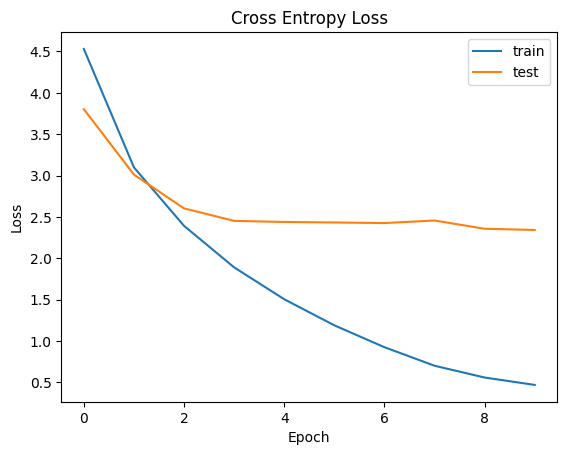

In [31]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.title('Cross Entropy Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


# Plot the Classification Accuracy

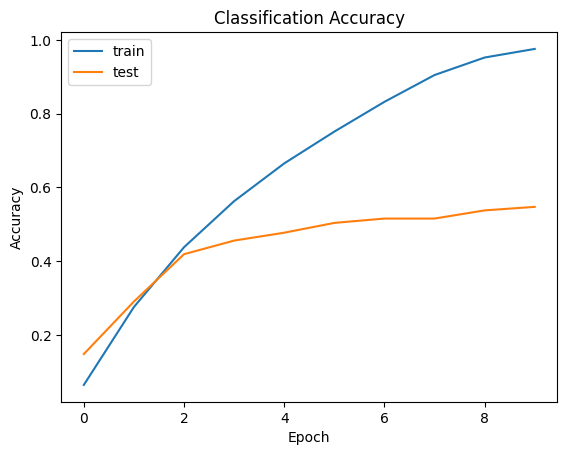

In [32]:
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.title('Classification Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


# Display the Confusion Matrix

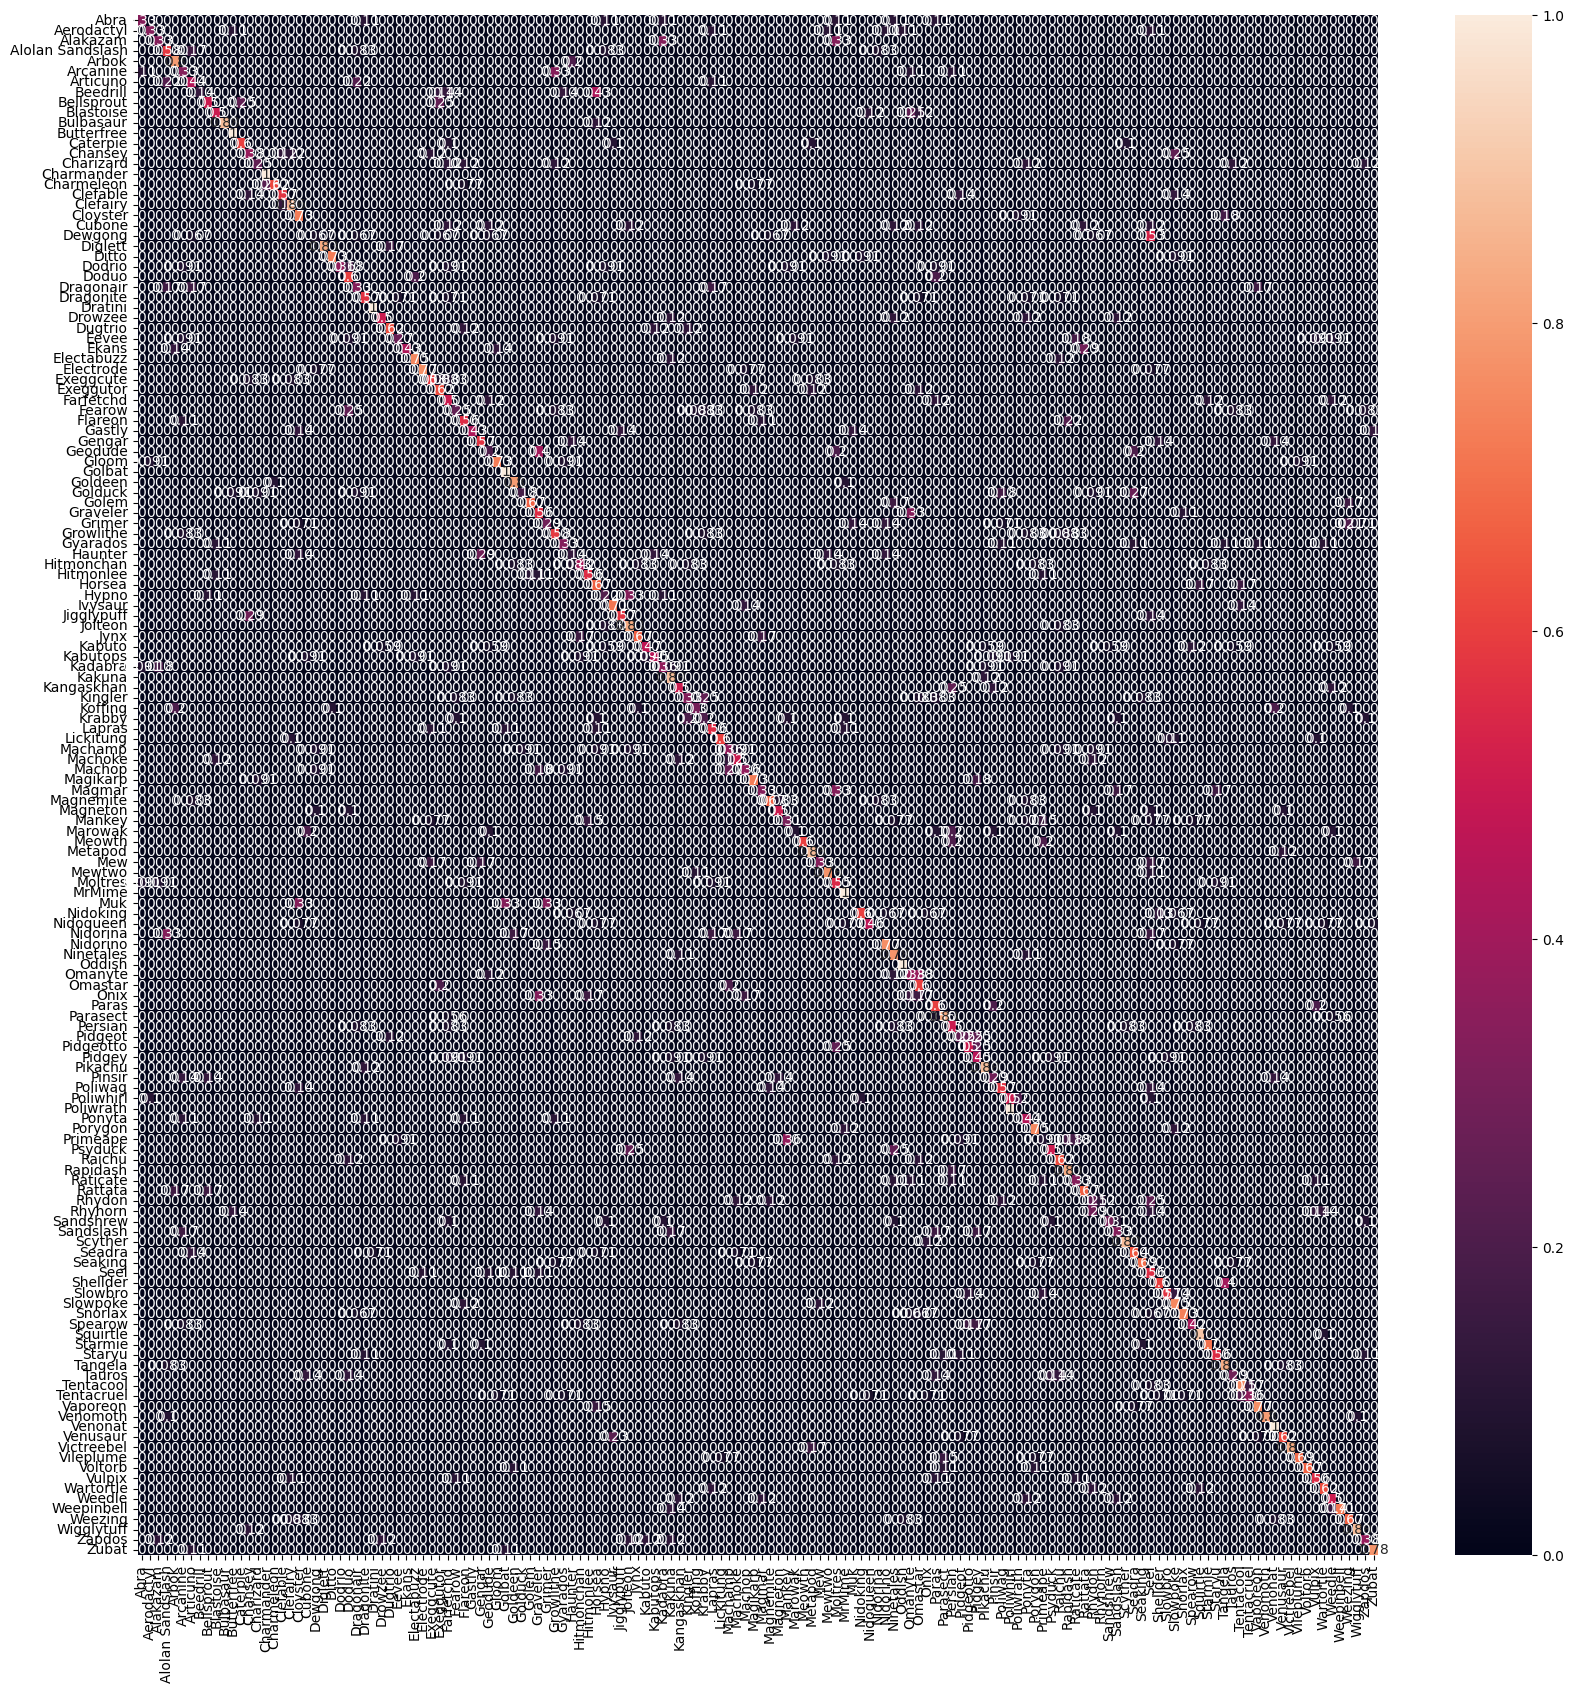

In [33]:
import seaborn as sns
from sklearn import metrics


# Get the confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, predicted_labels)

# Normalize the confusion matrix
confusion_matrix = confusion_matrix.astype('float') / confusion_matrix.sum(axis=1)[:, np.newaxis]

# Plot the confusion matrix
plt.figure(figsize=(20, 20))
sns.heatmap(confusion_matrix, annot=True, xticklabels=pokemon_list, yticklabels=pokemon_list)
plt.savefig("output/confusion_matrix_seaborn.png")
plt.show()



# Display the Feature Maps

1/1 [==============================] - 0s 250ms/step


<Figure size 2000x2000 with 0 Axes>

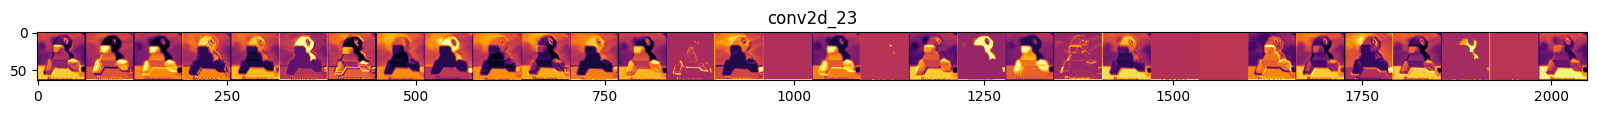

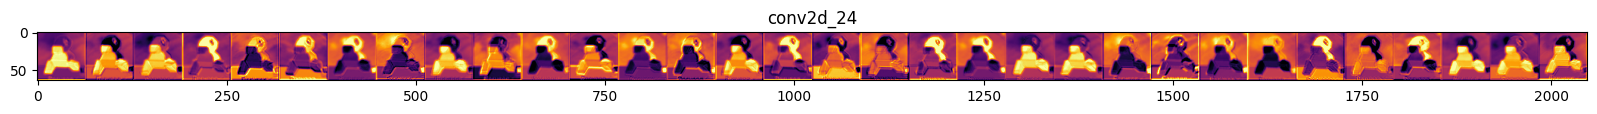

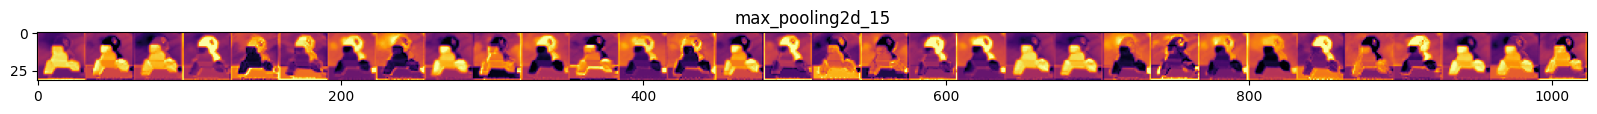

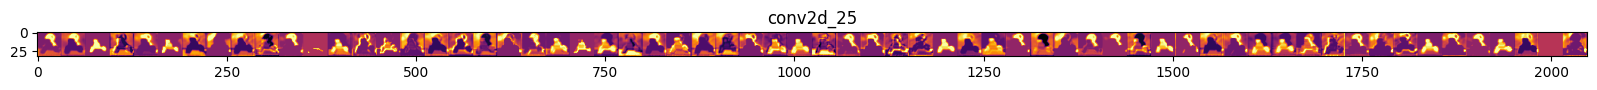

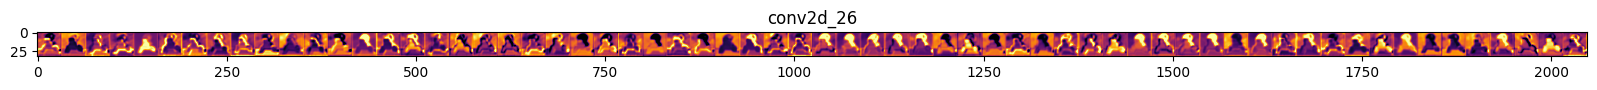

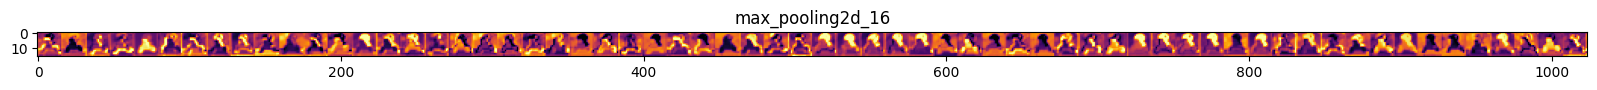

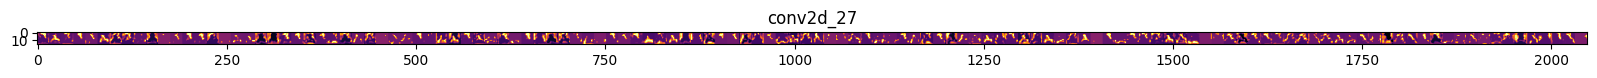

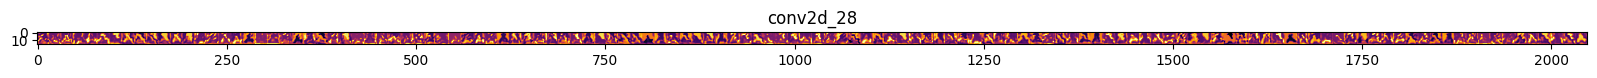

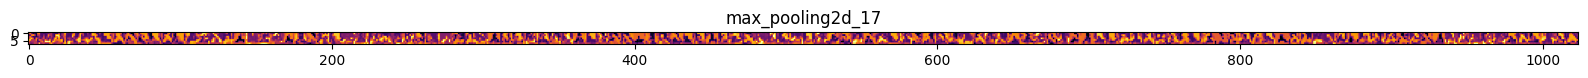

In [34]:
from tensorflow.keras.models import Model

# Create a model that will return the feature maps
layer_outputs = [layer.output for layer in model.layers]
activation_model = Model(inputs=model.input, outputs=layer_outputs)

# Get the feature maps for the first image
img = x_test[0]
img = np.expand_dims(img, axis=0)
feature_maps = activation_model.predict(img)

# Plot the feature maps
plt.figure(figsize=(20, 20))
for layer_index, feature_map in enumerate(feature_maps):
    if len(feature_map.shape) == 4:
        # Plot the feature maps for the conv / maxpool layers
        n_features = feature_map.shape[-1]  # number of features in the feature map
        size = feature_map.shape[1]  # feature map shape (1, size, size, n_features)
        display_grid = np.zeros((size, size * n_features))
        for i in range(n_features):
            x = feature_map[0, :, :, i]
            x -= x.mean()  # post-processes the feature 
            x /= max(x.std(), 1e-4)
            x *= 64
            x += 128
            x = np.clip(x, 0, 255).astype('uint8')
            display_grid[:, i * size : (i + 1) * size] = x  # tile each filter into a horizontal grid
        scale = 20. / n_features
        plt.figure(figsize=(scale * n_features, scale))
        plt.title(model.layers[layer_index].name)
        plt.grid(False)
        plt.imshow(display_grid, aspect='auto', cmap='inferno')
        plt.savefig("output/feature_maps.png")
        plt.show()
    




# Visualize maximal activation

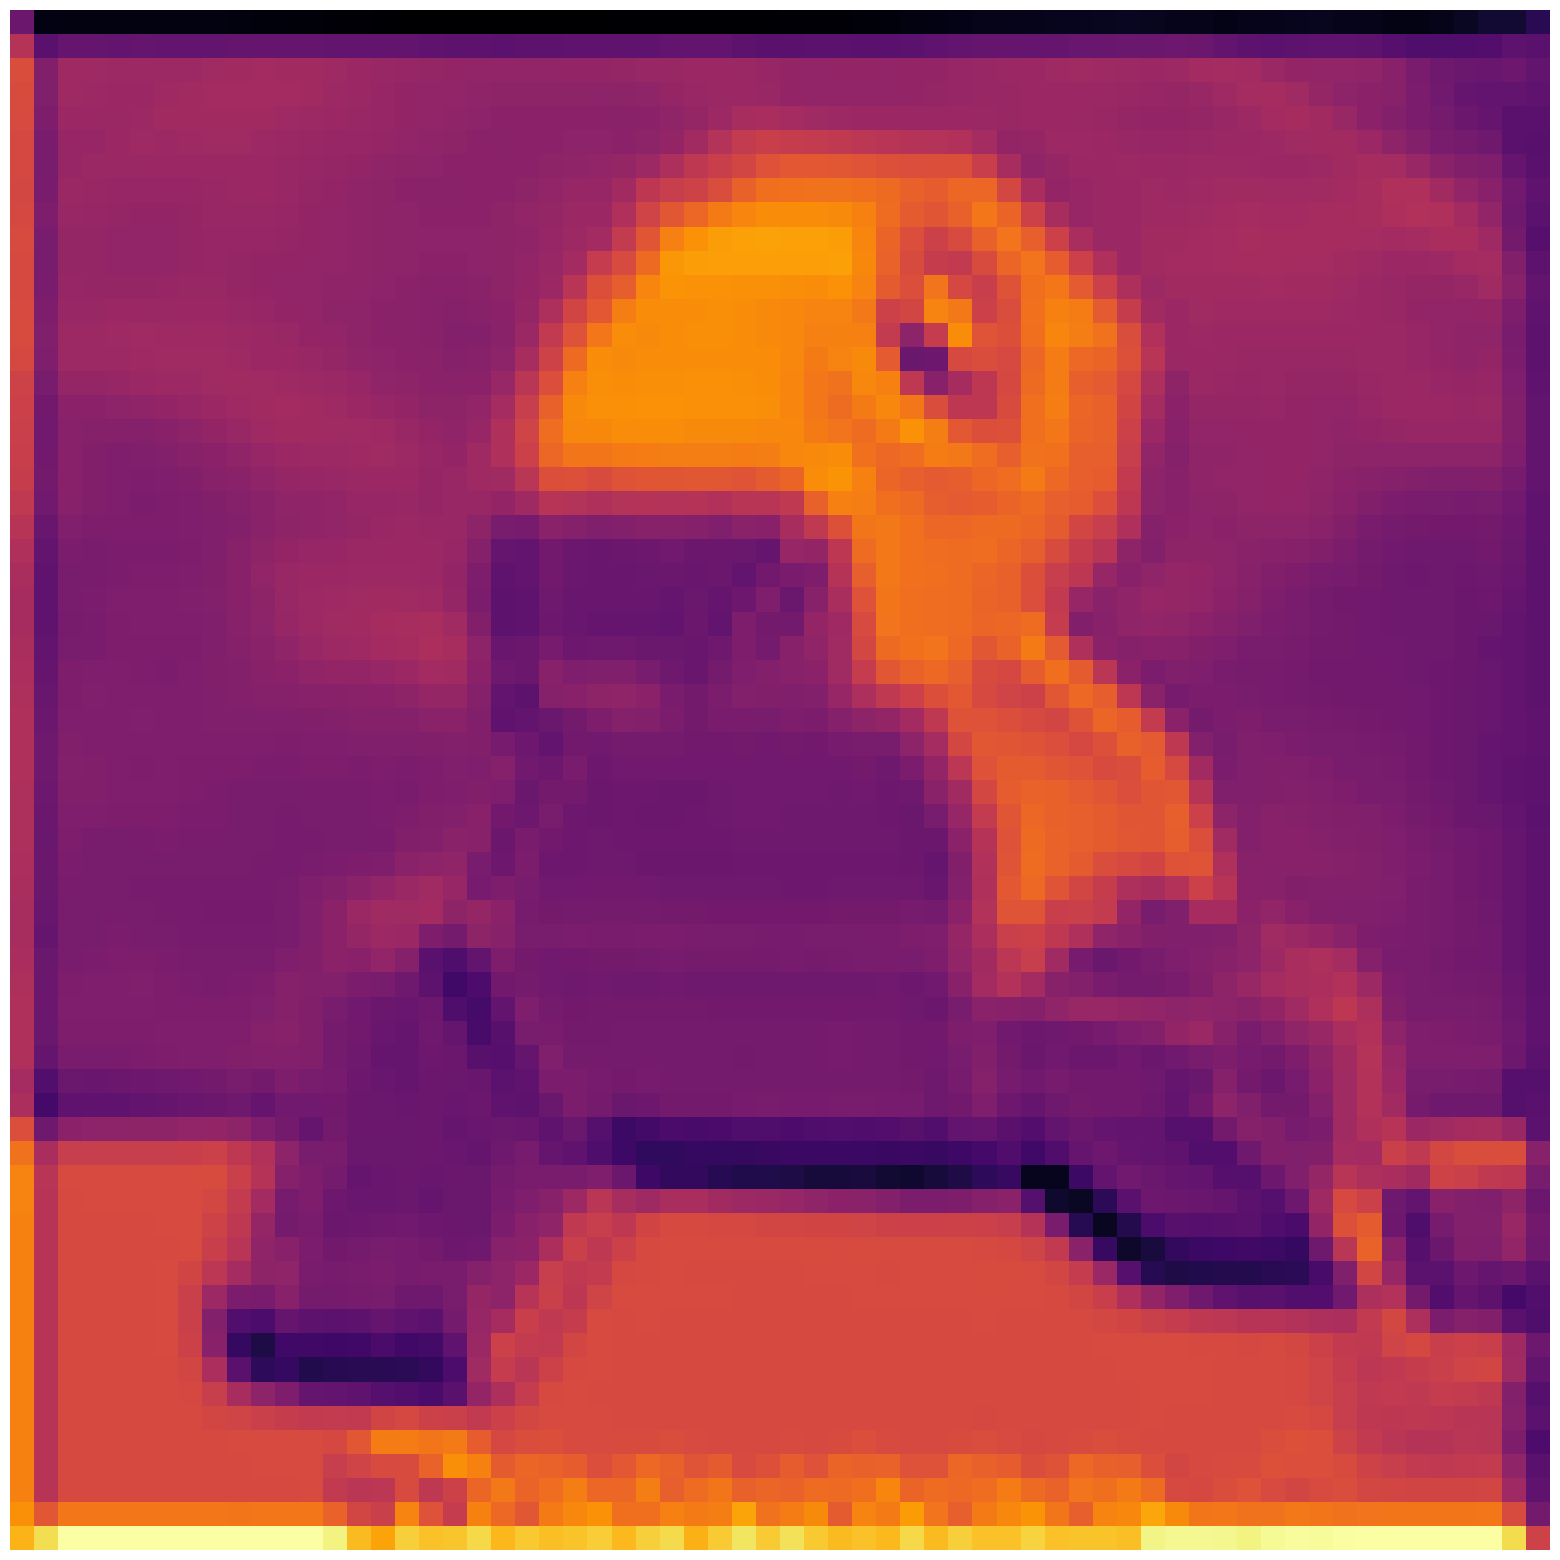

In [35]:
from tensorflow.keras import backend as K

# Create a function that will return the output of a specific layer
get_layer_output = K.function([model.layers[0].input], [model.layers[1].output])

# Get the output of the layer after the first convolution
layer_output = get_layer_output([img])[0]

# Get the index of the feature map with the highest mean activation
max_activation_index = np.argmax(np.mean(layer_output, axis=(0, 1, 2)))

# Plot the feature map with the highest mean activation
plt.figure(figsize=(20, 20))
plt.imshow(layer_output[0, :, :, max_activation_index], cmap='inferno')
plt.axis("off")
plt.savefig("output/max_activation.png")
plt.show()



# 

# Visualize the filters

In [36]:
# from tensorflow.keras import backend as K
# 
# # Create a function that will return the output of a specific layer
# 
# get_layer_output = K.function([model.layers[0].input], [model.layers[1].output])
# 
# # Get the output of the layer after the first convolution
# layer_output = get_layer_output([img])[0]
# 
# # Get the index of the feature map with the highest mean activation
# max_activation_index = np.argmax(np.mean(layer_output, axis=(0, 1, 2)))
# 
# # Plot the feature map with the highest mean activation
# plt.figure(figsize=(20, 20))
# plt.imshow(layer_output[0, :, :, max_activation_index], cmap='inferno')
# plt.axis("off")
# 
# # Get the weights of the filters in the first convolutional layer
# filters, biases = model.layers[1].get_weights()
# 
# # Normalize the filters
# f_min, f_max = filters.min(), filters.max()
# filters = (filters - f_min) / (f_max - f_min)
# 
# # Plot the filters
# n_filters, ix = 6, 1
# plt.figure(figsize=(20, 20))
# 
# for i in range(n_filters):
#     # Get the filter
#     f = filters[:, :, :, i]
#     # Plot each channel separately
#     for j in range(3):
#         # Specify subplot and turn of axis
#         ax = plt.subplot(n_filters, 3, ix)
#         ax.set_xticks([])
#         ax.set_yticks([])
#         # Plot filter channel in grayscale
#         plt.imshow(f[:, :, j], cmap='gray')
#         ix += 1
#     
# # Show the figure
# plt.savefig("output/filters.png")
# plt.show()
# 


# Save the model

In [37]:
#model.save('output/pokemon_model.h5')

# Grab a random image from the testing set and remove the background

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

# pick a random image from the testing set
random_pokemon = random.choice(os.listdir(TEST_DIR))
random_pokemon_image = random.choice(os.listdir(TEST_DIR + '/' + random_pokemon))
img = mpimg.imread(TEST_DIR + '/' + random_pokemon + '/' + random_pokemon_image)

# convert image to grayscale
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# find contours
ret, thresh = cv.threshold(gray, 0, 255, cv.THRESH_BINARY_INV + cv.THRESH_OTSU)
contours, hierarchy = cv.findContours(thresh, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

# find contour with max area
cnt = max(contours, key=lambda x: cv.contourArea(x))

# create a mask
mask = np.zeros(img.shape[:2], np.uint8)
cv.drawContours(mask, [cnt], -1, 255, -1)

# apply mask
masked_img = cv.bitwise_and(img, img, mask=mask)

# save the image
plt.imsave("output/random_pokemon.png", masked_img)
plt.imshow(masked_img)
plt.show()

ModuleNotFoundError: No module named 'cv2'